Самостоятельная работа №1. Применение свертки для анализа временных рядов
загружаем данные по индексу S&P за последние 5 лет

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from thinkdsp import underride, decorate, legend

data = pd.read_csv('files1/HistoricalData_1726986336918.csv')
data['Date'] = pd.to_datetime(data['Date'], format="%m/%d/%Y")
data.sort_values(by='Date', inplace=True)
data.index = range(0, len(data['Date']))

строим график тренда на основа скользящего среднего

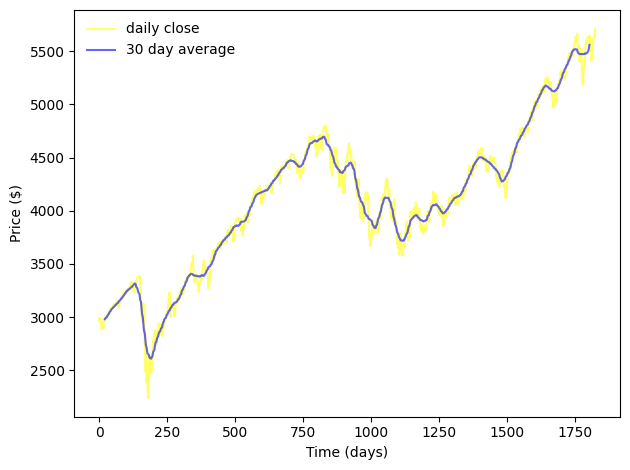

In [3]:
close = data['Close/Last']
dates = data['Date']
# разница в днях относительно первой даты в таблице. В результате создается серия с количеством дней от первой даты.
days = (dates - dates[0]) / np.timedelta64(1, 'D')

# длина окна скользящего среднего (30 дней).
M = 30

# создается окно длиной 30 дней, заполненное единицами.
window = np.ones(M)

# нормализация окна (чтобы сумма его значений была равна 1).
window /= sum(window)

# используется свертка, чтобы вычислить скользящее среднее по данным о цене закрытия. Результат — это сглаженные данные.
smoothed = np.convolve(close, window, mode='valid')

# массив дней, соответствующих сглаженным значениям (коррекция из-за длины окна).
smoothed_days = days[M//2: len(smoothed) + M//2]

# строится линия для ежедневной цены закрытия.
plt.plot(days, close, color='yellow', alpha=0.6, label='daily close')

# строится линия сглаженного скользящего среднего (30-дневное окно)
plt.plot(smoothed_days, smoothed, color='blue', alpha=0.6, label='30 day average')

decorate(xlabel='Time (days)', ylabel='Price ($)')
plt.show()

Ядра для периодичности и аномалий

In [4]:
# 2. Разностное ядро (периодичности)
# Для выделения периодичностей можно использовать разностное ядро, которое будет усиливать частые изменения и колебания в данных.
periodicity_kernel = np.array([-1, 1])
periodicity = np.convolve(close, periodicity_kernel, mode='valid')

In [5]:
# 3. Ядро для выявления аномалий
# Для выделения аномалий полезно использовать ядра типа "соболь" или разностные ядра более высокого порядка. Это позволяет выявлять резкие изменения и скачки в данных.
anomaly_kernel = np.array([-1, 2, -1])
anomaly = np.convolve(close, anomaly_kernel, mode='valid')

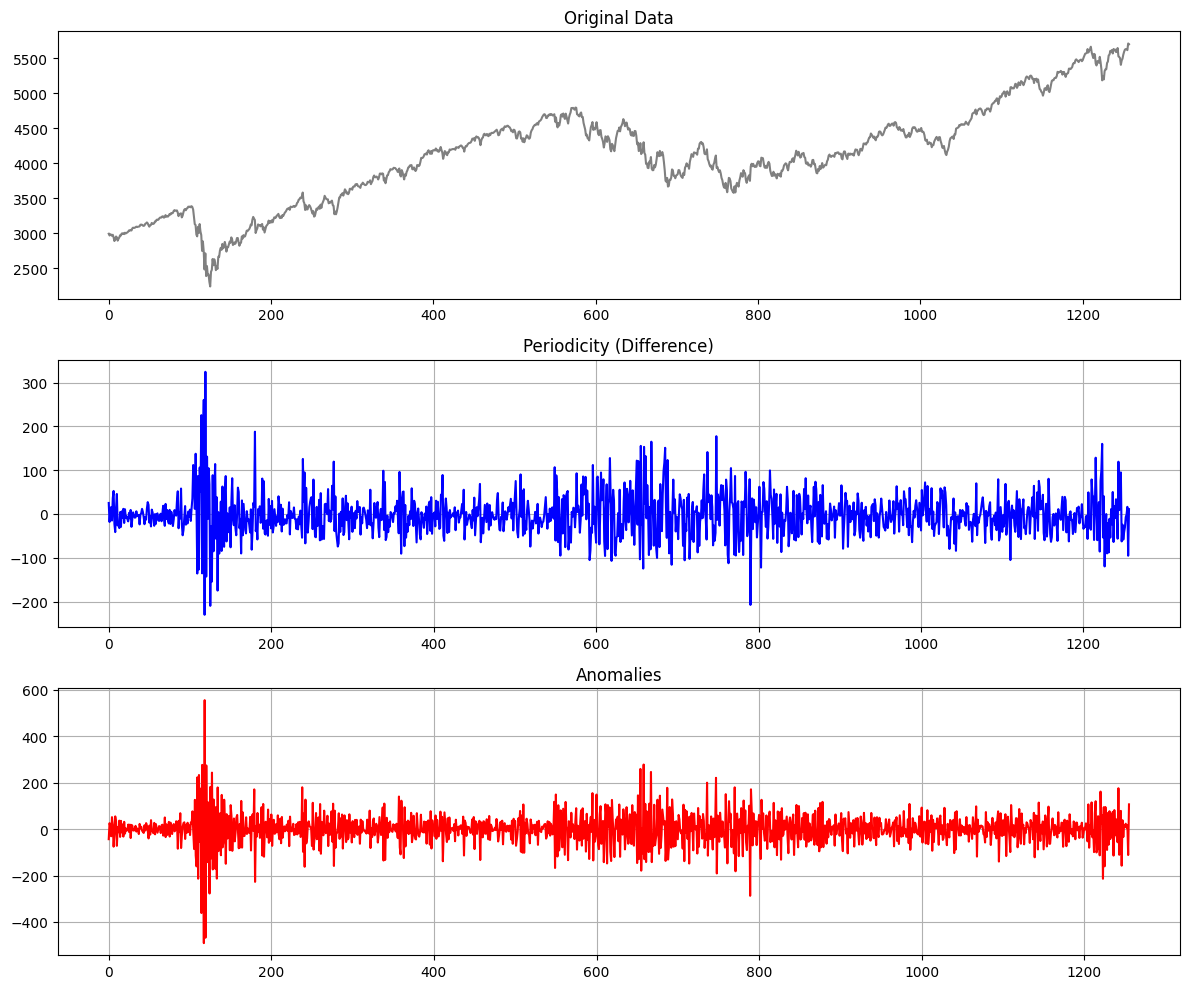

In [10]:
# Визуализация
plt.figure(figsize=(12, 10))

# Исходные данные
plt.subplot(3, 1, 1)
plt.plot(close, label='Original Data', color='gray')
plt.title('Original Data')

# Периодичности
plt.subplot(3, 1, 2)
plt.plot(periodicity, label='Periodicity (Difference)', color='blue')
plt.title('Periodicity (Difference)')
plt.grid(True)

# Аномалии
plt.subplot(3, 1, 3)
plt.plot(anomaly, label='Anomalies', color='red')
plt.title('Anomalies')
plt.grid(True)

plt.tight_layout()
plt.show()